Installing HyPyP with pip 

In [2]:
!pip install hypyp

     |████████████████████████████████| 48 kB 4.4 MB/s 
     |████████████████████████████████| 3.1 MB 29.3 MB/s 
     |████████████████████████████████| 158 kB 71.5 MB/s 
     |████████████████████████████████| 294 kB 54.7 MB/s 
     |████████████████████████████████| 138 kB 59.1 MB/s 
     |████████████████████████████████| 9.5 MB 49.3 MB/s 
     |████████████████████████████████| 596 kB 42.0 MB/s 
     |████████████████████████████████| 8.3 MB 18.5 MB/s 
     |████████████████████████████████| 23.1 MB 1.4 MB/s 
     |████████████████████████████████| 6.8 MB 24.4 MB/s 
     |████████████████████████████████| 317 kB 35.5 MB/s 
     |████████████████████████████████| 59.9 MB 76 kB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.2

##Load useful libs

### Core

In [1]:
import io
from copy import copy
from collections import OrderedDict
import requests
import mne
import math

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


### Data science

In [2]:
import numpy as np
import scipy

### Visualization

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from hypyp.ext.mpl3d import glm
from hypyp.ext.mpl3d.mesh import Mesh
from hypyp.ext.mpl3d.camera import Camera

### MNE

In [4]:
import mne

### HyPyP

In [5]:
from hypyp import prep 
from hypyp import analyses
from hypyp import stats
from hypyp import viz

### Setting parameters
Frequency bands used in the study

In [6]:
freq_bands = {'Theta': [4, 7],
              'Alpha-Low': [7.5, 11],
              'Alpha-High': [11.5, 13],
              'Beta': [13.5, 29.5],
              'Gamma': [30, 48]}

Keep the order of frequency bands in the dictionary

In [7]:
freq_bands = OrderedDict(freq_bands)

### Load data
Loading datasets

For each participant, both .set file and .fdt files should be in the same directory.

In this notebook, we use data that is preprocessed in EEGlab: data should be epoched and corrected by an ICA algorithm.

Note: it is not necessary that participants have the same number of epochs, but they must have same number of samples per epoch 

In [124]:
!pip install wget

In [ ]:
import os

directory = "EEGLAB"
  
# Parent Directory path
parent_dir = "C:/Users/win_10"
  
# Path
path = os.path.join(parent_dir, directory)
  

os.mkdir(path)

In [ ]:
import wget

print('Beginning file download with wget module')

url_1 = "https://github.com/ghazalehran/HyPyP/blob/master/data/EEGLAB/eeglab_data_epochs_ica.set"

wget.download(url_1,path )

url_2 = "https://github.com/ghazalehran/HyPyP/blob/master/data/EEGLAB/eeglab_data_epochs_ica.fdt"

wget.download(url_2, path)

In [ ]:
path_1 = "EEGLAB/eeglab_data_epochs_ica.set"

path_2 = "EEGLAB/eeglab_data_epochs_ica.set"

epo1 = mne.io.read_epochs_eeglab(
    path_1
)

epo2 = mne.io.read_epochs_eeglab(
    path_2
)

We need to equalize the number of epochs between our two participants.

In [9]:
mne.epochs.equalize_epoch_counts([epo1, epo2])

Dropped 0 epochs: 
Dropped 0 epochs: 


Specify sampling frequency

In [10]:
sampling_rate = epo1.info['sfreq']

Choosing sensors in international standard 10/20 system for using the MNE template and overwrite the EEGlab position.

Note: EOG (Eyes) are removed for this analysis

In [11]:
StanSys = ['Nz', 'Fp1', 'Fpz', 'Fp2', 'F7', 'F9', 'PO3',
                     'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'CP3', 'PO4',
                     'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P3', 'PO7',
                     'P4', 'T6', 'O1', 'Oz', 'O2', 'Iz', 'P1', 'PO8',
                     'AF3', 'AF7', 'AF4', 'AF8', 'F6', 'F10', 'F2',  'F5', 
                     'FC1', 'FC3', 'FC5', 'FCz', 'FC2', 'FC4', 'FC6', 'F1',
                     'FT9', 'FT7', 'FT8', 'FT10', 'C5', 'C6', 'CPz', 'CP1', 
                     'CP5', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'TP7', 'TP9', 
                     'P5', 'P7', 'P9', 'P2', 'P4', 'P6', 'P8', 'P10', 'POz']

In [12]:
low_StanSys = []
for name in StanSys:
  low_StanSys.append(name.lower())

In [13]:
names_epo1 = np.array([ch['ch_name'] for ch in epo1.info['chs']])
names_epo2 = np.array([ch['ch_name'] for ch in epo2.info['chs']])

In [26]:
epo_ref1 = epo1.copy()
for idx in range(len(names_epo1)):
  aux_name = names_epo1[idx].lower()
  if aux_name in low_StanSys:
    ind = low_StanSys.index(aux_name)
    nw_ch = StanSys[ind]
    #print(nw_ch)
    #print(aux_name)
    mne.rename_channels(epo_ref1.info, {names_epo1[idx]:nw_ch})
  else:
    #print(names_epo1[idx])
    epo_ref1.drop_channels(names_epo1[idx]) 


In [31]:
epo_ref2 = epo2.copy()
for idx in range(len(names_epo2)):
  aux_name = names_epo2[idx].lower()
  if aux_name in low_StanSys:
    ind = low_StanSys.index(aux_name)
    nw_ch = StanSys[ind]
    #print(nw_ch)
    #print(aux_name)
    mne.rename_channels(epo_ref2.info, {names_epo2[idx]:nw_ch})
  else:
    #print(names_epo1[idx])
    epo_ref2.drop_channels(names_epo2[idx]) 

In [63]:
locations = mne.channels.make_standard_montage('standard_1020', head_size=0.092)

In [64]:
c = locations._get_ch_pos()

In [65]:
epo_ref2.set_montage(locations)

<EpochsEEGLAB |  80 events (all good), -1 - 1.99219 sec, baseline off, ~6.6 MB, data loaded,
 'square': 5
 'square/rt': 73
 'square/square/rt': 2>

In [60]:
epo_ref1.set_montage(locations)

<EpochsEEGLAB |  80 events (all good), -1 - 1.99219 sec, baseline off, ~6.6 MB, data loaded,
 'square': 5
 'square/rt': 73
 'square/square/rt': 2>

## Analysing data
### Welch Power Spectral Density
Here for ex, the frequency-band-of-interest is restricted to Alpha_Low, frequencies for which power spectral density is actually computed are returned in freq_list, and PSD values are averaged across epochs

In [36]:
epo4 = epo_ref1[0:40]
epo5 = epo_ref2[40:80]

In [38]:
psd1 = analyses.pow(epo4, fmin=7.5, fmax=11,
                    n_fft=1000, n_per_seg=1000, epochs_average=True)
psd2 = analyses.pow(epo5, fmin=7.5, fmax=11,
                    n_fft=1000, n_per_seg=1000, epochs_average=True)
data_psd = np.array([psd1.psd, psd2.psd])

Effective window size : 7.812 (s)
Effective window size : 7.812 (s)


### Connectivity
Initializing data and storage

In [39]:
data_inter = np.array([epo4, epo5])
result_intra = []

Computing analytic signal per frequency band

In [40]:
complex_signal = analyses.compute_freq_bands(data_inter, sampling_rate,
                                             freq_bands)

Computing frequency- and time-frequency-domain connectivity, 'ccorr' for example

In [41]:
result = analyses.compute_sync(complex_signal, mode='ccorr')

Slicing results to get the Inter-brain part of the matrix

In [42]:
n_ch = len(epo4.info['ch_names'])
theta, alpha_low, alpha_high, beta, gamma = result[:, 0:n_ch, n_ch:2*n_ch]


Choosing Alpha_Low for futher analyses for example

In [43]:
values = alpha_low
values -= np.diag(np.diag(values))

Computing Cohens'D for further analyses for example

In [44]:
C = (values - np.mean(values[:])) / np.std(values[:])

Slicing results to get the Intra-brain part of the matrix

In [45]:
for i in [0, 1]:
    theta, alpha_low, alpha_high, beta, gamma = result[:, i:i+n_ch, i:i+n_ch]
    # choosing Alpha_Low for futher analyses for example
    values_intra = alpha_low
    values_intra -= np.diag(np.diag(values_intra))
    # computing Cohens'D for further analyses for example
    C_intra = (values_intra -
               np.mean(values_intra[:])) / np.std(values_intra[:])
    # can also sample CSD values directly for statistical analyses
    result_intra.append(C_intra)

## Statistical analyses
### Comparing PSD values to random signal
Parametric t test

####1/ MNE test without any correction
This function takes samples (observations) by number of tests (variables i.e. channels), thus PSD values are averaged in the frequency dimension


In [46]:
psd1_mean = np.mean(psd1.psd, axis=1)
psd2_mean = np.mean(psd2.psd, axis=1)
X = np.array([psd1_mean, psd2_mean])
T_obs, p_values, H0 = mne.stats.permutation_t_test(X=X, n_permutations=5000,
                                                   tail=0, n_jobs=1)

Permuting 1 times (exact test)...


In [47]:
statsCondTuple = stats.statsCond(data=data_psd,
                                 epochs=epo4,
                                 n_permutations=5000,
                                 alpha=0.05)

Permuting 1 times (exact test)...


####3/ Non-parametric cluster-based permutations¶
Creating matrix of a priori connectivity between channels across space and frequencies based on their position, in the Alpha_Low band for example

In [48]:
con_matrixTuple = stats.con_matrix(epo4, freqs_mean=psd1.freq_list)
ch_con_freq = con_matrixTuple.ch_con_freq

Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 28


Creating two fake groups with twice the 'participant1' and twice the 'participant1'

In [49]:
data_group = [np.array([psd1.psd, psd1.psd]), np.array([psd2.psd, psd2.psd])]

statscondCluster = stats.statscondCluster(data=data_group,
                                          freqs_mean=psd1.freq_list,
                                          ch_con_freq=scipy.sparse.bsr_matrix(ch_con_freq),
                                          tail=0,
                                          n_permutations=5000,
                                          alpha=0.05)

Using a threshold of 18.512821
stat_fun(H1): min=inf max=inf
Running initial clustering


/usr/local/lib/python3.7/dist-packages/hypyp/stats.py:341: RuntimeWarning: Ignoring argument "tail", performing 1-tailed F-test
  t_power=1, out_type='mask')
/usr/local/lib/python3.7/dist-packages/mne/stats/parametric.py:180: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


Found 1 clusters
Permuting 4999 times...


  0%|          |  : 0/4999 [00:00<?,       ?it/s]

/usr/local/lib/python3.7/dist-packages/mne/stats/parametric.py:180: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


Computing cluster p-values
Done.


###Comparing Intra-brain connectivity values between participants¶
With 3/ non-parametric cluster-based permutations creating matrix of a priori connectivity between channels across space and frequencies based on their position

In [50]:
con_matrixTuple = stats.con_matrix(
    epochs=epo4, freqs_mean=np.arange(7.5, 11), draw=False)

Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 28


Note that for connectivity, values are computed for every integer in the frequency bin from fmin to fmax, freqs_mean=np.arange(fmin, fmax) whereas in PSD it depends on the n_fft parameter psd.freq_list

For CSD, values are averaged across each frequencies so you do not need to take frequency into account to correct clusters

In [51]:
ch_con = con_matrixTuple.ch_con

Create again two fake groups with twice the 'participant1' and twice the 'participant2'

In Alpha_Low band for example (see above):

In [52]:
Alpha_Low = [np.array([result_intra[0], result_intra[0]]),
             np.array([result_intra[1], result_intra[1]])]

statscondCluster_intra = stats.statscondCluster(data=Alpha_Low,
                                                freqs_mean=np.arange(7.5, 11),
                                                ch_con_freq=scipy.sparse.bsr_matrix(ch_con),
                                                tail=0,
                                                n_permutations=5000,
                                                alpha=0.05)

Using a threshold of 18.512821
stat_fun(H1): min=inf max=inf
Running initial clustering


/usr/local/lib/python3.7/dist-packages/hypyp/stats.py:341: RuntimeWarning: Ignoring argument "tail", performing 1-tailed F-test
  t_power=1, out_type='mask')
/usr/local/lib/python3.7/dist-packages/mne/stats/parametric.py:180: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


Found 1 clusters
Permuting 4999 times...


  0%|          |  : 0/4999 [00:00<?,       ?it/s]

/usr/local/lib/python3.7/dist-packages/mne/stats/parametric.py:180: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


Computing cluster p-values
Done.


###Comparing Inter-brain connectivity values to random signal¶
No a priori connectivity between channels is considered between the two participants

In Alpha_Low band for example (see above), create another time two fake groups with twice the 'participant1' and twice the 'participant2'

In [53]:
data = [np.array([values, values]), np.array([result_intra[0], result_intra[0]])]

statscondCluster = stats.statscondCluster(data=data,
                                          freqs_mean=np.arange(7.5, 11),
                                          ch_con_freq=None,
                                          tail=0,
                                          n_permutations=5000,
                                          alpha=0.05)

Using a threshold of 18.512821
stat_fun(H1): min=inf max=inf
Running initial clustering
Found 1 clusters
Permuting 4999 times...


/usr/local/lib/python3.7/dist-packages/hypyp/stats.py:341: RuntimeWarning: Ignoring argument "tail", performing 1-tailed F-test
  t_power=1, out_type='mask')
/usr/local/lib/python3.7/dist-packages/mne/stats/parametric.py:180: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


  0%|          |  : 0/4999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.


In [54]:
viz.plot_significant_sensors(
    T_obs_plot=statsCondTuple.T_obs, epochs=epo4)

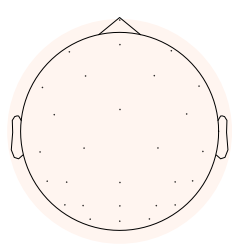

In [55]:
viz.plot_significant_sensors(
    T_obs_plot=statsCondTuple.T_obs_plot, epochs=epo5)

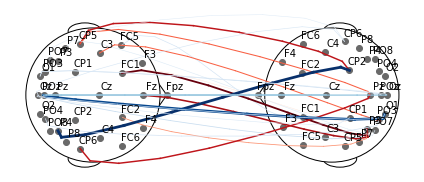

In [66]:
viz.viz_2D_topomap_inter(epo4, epo5, C, threshold='auto', steps=10, lab=True)

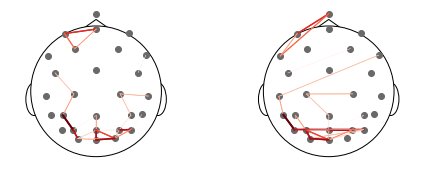

In [67]:
viz.viz_2D_topomap_intra(epo4, epo5,
                         C1= result_intra[0],
                         C2= result_intra[1],
                         threshold='auto',
                         steps=2,
                         lab=False)